In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
import datetime as dt
import seaborn as sns; sns.set()

# make sure the plots are shown in the notebook inline
%matplotlib inline

In [24]:
df = pd.read_excel('BRIAN_Questionnaire_results.xlsx')
df.head()

,ID,Start time,Completion time,Email,Name,Language,"Jeg bruger en virtuel assistent (Siri, Google Assistent, Alexa) i forvejen.",En virtuel assistent på min computer kunne være interessant at prøve.,"Følgende er en liste over mulige funktioner, en sådan assistent kunne udføre på din computer. Markere venligst ALLE, som du synes kunne være interessante.\nHusk, at alle funktioner er stemmestyret.","Hvis du har forslag til andre funktioner, må du gerne skrive dem her.",Skal assistenten kende dit navn og bruge det når han/hun taler til dig?,"Skal assistenten vise det han/hun siger for at fremme forståelse (""undertekster"")?","Skal assistentens sprog være formelt eller mere familiært? For eksempen, skal han/hun sige ""Undskyld, jeg har ikke forstået"", eller er det ok med ""Hvabeha?"" :)","Skal assistenten være en mand, en kvinde, eller ikke-binær?",Hvor gammel er du?,Hvad er dit køn?
0,1,2022-02-10 17:12:48,2022-02-10 17:15:08,anonymous,NaN,Dansk,Nej,Ja,Informationssøgning på Google;Oversættelse til...,Gemme det arbejde man er i gang med,Nej,Ja,Formelt sprog,Kvinde,25-34,Kvinde
1,2,2022-02-10 17:15:01,2022-02-10 17:19:38,anonymous,NaN,Dansk,Nej,Ja,Informationssøgning på Google;Oplæse indkomne ...,Har ikke andre forslag,Nej,Ja,Formelt sprog,Mand,55-64,Kvinde
2,3,2022-02-10 17:22:48,2022-02-10 17:25:34,anonymous,NaN,Dansk,Ja,Ja,Informationssøgning på Google;Informationssøgn...,Nej,Ja,Ja,Familiært sprog,Mand,45-54,Mand
3,4,2022-02-10 17:22:17,2022-02-10 17:26:16,anonymous,NaN,Dansk,Nej,Ja,Oversættelse til et valgfrit sprog (Google ove...,At det er nemt at aktivere,Nej,Ja,Familiært sprog,Ikke-binær,55-64,Kvinde
4,5,2022-02-10 17:27:24,2022-02-10 17:29:31,anonymous,NaN,Dansk,Ja,Ja,Oversættelse til et valgfrit sprog (Google ove...,Nej,Ja,Ja,Familiært sprog,Ikke-binær,45-54,Kvinde


In [25]:
df = df.rename(columns = {'Jeg bruger en virtuel assistent (Siri, Google Assistent, Alexa) i forvejen.':'AlreadyUse',
               'En virtuel assistent på min computer kunne være interessant at prøve.':'HasInterest',
               'Følgende er en liste over mulige funktioner, en sådan assistent kunne udføre på din computer. Markere venligst ALLE, som du synes kunne være interessante.\nHusk, at alle funktioner er stemmestyret.':'PossibleFunctions',
               'Hvis du har forslag til andre funktioner, må du gerne skrive dem her.':'Other',
               'Skal assistenten kende dit navn og bruge det når han/hun taler til dig?':'KnowYourName',
               'Skal assistenten vise det han/hun siger for at fremme forståelse ("undertekster")?':'Subtitles',
               'Skal assistentens sprog være formelt eller mere familiært? For eksempen, skal han/hun sige "Undskyld, jeg har ikke forstået", eller er det ok med "Hvabeha?" :)':'Formal/informal',
               'Skal assistenten være en mand, en kvinde, eller ikke-binær?':'M/F/NB',
               'Hvor gammel er du?':'Age',
               'Hvad er dit køn?':'Gender'}
              )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 102 non-null    int64         
 1   Start time         102 non-null    datetime64[ns]
 2   Completion time    102 non-null    datetime64[ns]
 3   Email              102 non-null    object        
 4   Name               0 non-null      float64       
 5   Language           102 non-null    object        
 6   AlreadyUse         102 non-null    object        
 7   HasInterest        102 non-null    object        
 8   PossibleFunctions  102 non-null    object        
 9   Other              20 non-null     object        
 10  KnowYourName       102 non-null    object        
 11  Subtitles          102 non-null    object        
 12  Formal/informal    102 non-null    object        
 13  M/F/NB             102 non-null    object        
 14  Age       

In [26]:
# split the strings into lists and update the df
df['PossibleFunctions'] = df['PossibleFunctions'].str.split(';')

# explode the lists
df = df.explode('PossibleFunctions').reset_index(drop=True) # This takes about 8 seconds

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 823 non-null    int64         
 1   Start time         823 non-null    datetime64[ns]
 2   Completion time    823 non-null    datetime64[ns]
 3   Email              823 non-null    object        
 4   Name               0 non-null      float64       
 5   Language           823 non-null    object        
 6   AlreadyUse         823 non-null    object        
 7   HasInterest        823 non-null    object        
 8   PossibleFunctions  823 non-null    object        
 9   Other              191 non-null    object        
 10  KnowYourName       823 non-null    object        
 11  Subtitles          823 non-null    object        
 12  Formal/informal    823 non-null    object        
 13  M/F/NB             823 non-null    object        
 14  Age       

In [27]:
# Oops - having corrected spelling later on created double columns - I'll merge here
df['PossibleFunctions'] = df['PossibleFunctions'].replace(['Påmindelser (i vælger hvornår)'],'Påmindelser (du vælger hvornår)')
df['PossibleFunctions'] = df['PossibleFunctions'].replace(['Vækkeur (præcis klokkeslet)'],'Vækkeur (præcis klokkeslæt)')
df['PossibleFunctions'] = df['PossibleFunctions'].replace(['Åbner programmer på jeres desktop'],'Åbner programmer på din desktop')

In [30]:
df.to_csv('questionnaire_results.csv')

In [6]:
result= df.groupby('PossibleFunctions')['ID'].nunique().reset_index().rename(columns={'ID': 'count', 'PossibleFunctions':'Function'})
# remove blank values
result = result[result['Function'] != '']
result.sort_values(by=['count'], inplace=True, ascending=True)
result

,Function,count
1,"""Fortæl mig en vittighed""",31
5,Informationssøgning på Wikipedia,36
7,Oplæse indkomne emails,38
12,Timer (om X minutter),39
11,Sende emails,42
2,Dagens nyheder,43
6,Matematiske beregninger,44
14,Vækkeur (præcis klokkeslæt),44
3,"Enhedskonvertering (valuta, vægt, osv.)",45
15,Åbner programmer på din desktop,45


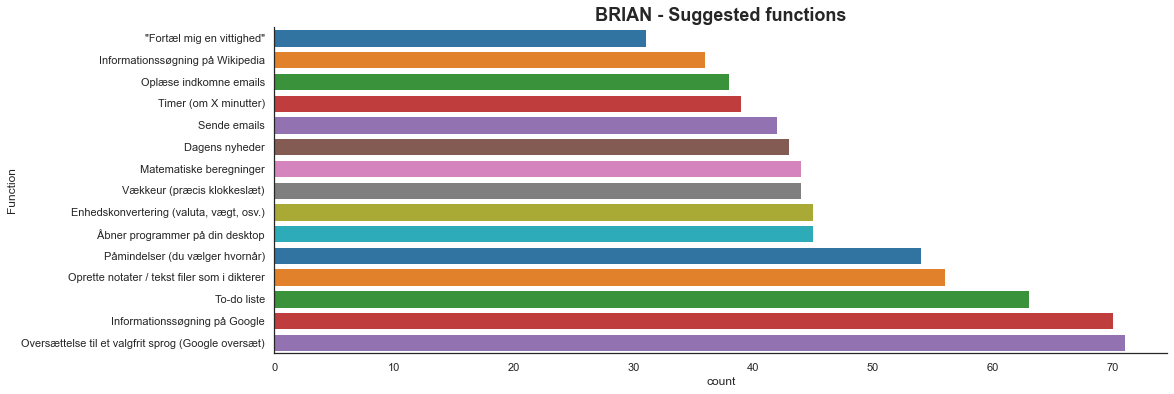

In [7]:
plt.figure(figsize=(16, 6))
sns.set_style("white")
sns.barplot(x = 'count',
            y = 'Function',
            data = result,
            palette = 'tab10',
            orient = 'h'
           ).set_title('BRIAN - Suggested functions', fontsize = 18, fontweight = 'bold')
sns.despine();

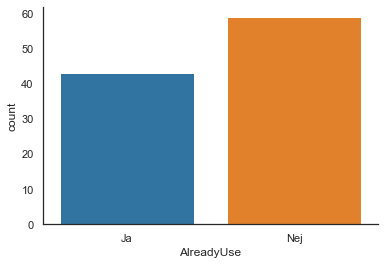

In [8]:
# count plot on single categorical variable
result= df.groupby('AlreadyUse')['ID'].nunique().reset_index().rename(columns={'ID': 'count'})
sns.barplot(x ='AlreadyUse', 
            y = 'count', 
            data = result, 
            palette = 'tab10'
           )
sns.despine();

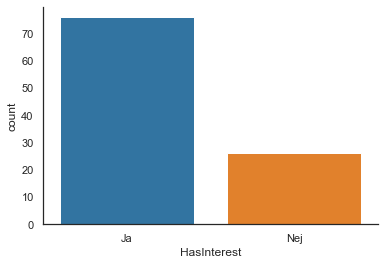

In [9]:
result= df.groupby('HasInterest')['ID'].nunique().reset_index().rename(columns={'ID': 'count'})
sns.barplot(x ='HasInterest', 
            y = 'count', 
            data = result, 
            palette = 'tab10'
           )
sns.despine();

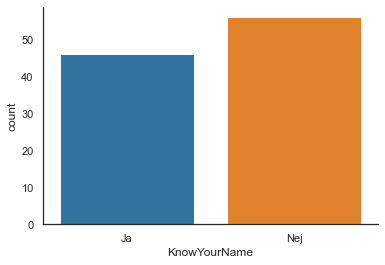

In [10]:
result= df.groupby('KnowYourName')['ID'].nunique().reset_index().rename(columns={'ID': 'count'})
sns.barplot(x ='KnowYourName', 
            y = 'count', 
            data = result, 
            palette = 'tab10'
           )
sns.despine();

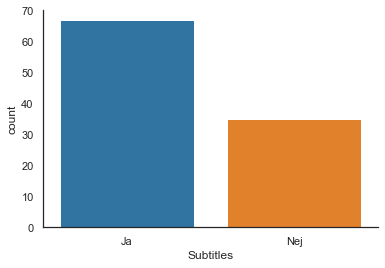

In [11]:
result= df.groupby('Subtitles')['ID'].nunique().reset_index().rename(columns={'ID': 'count'})
sns.barplot(x ='Subtitles', 
            y = 'count', 
            data = result, 
            palette = 'tab10'
           )
sns.despine();

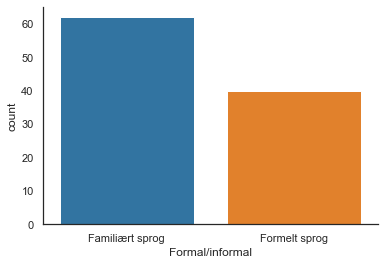

In [12]:
result= df.groupby('Formal/informal')['ID'].nunique().reset_index().rename(columns={'ID': 'count'})
sns.barplot(x ='Formal/informal', 
            y = 'count', 
            data = result, 
            palette = 'tab10'
           )
sns.despine();

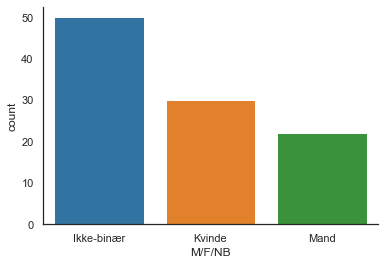

In [13]:
result= df.groupby('M/F/NB')['ID'].nunique().reset_index().rename(columns={'ID': 'count'})
sns.barplot(x ='M/F/NB', 
            y = 'count', 
            data = result, 
            palette = 'tab10'
           )
sns.despine();

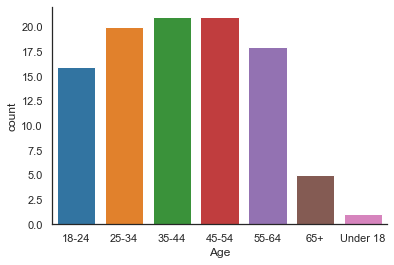

In [14]:
result= df.groupby('Age')['ID'].nunique().reset_index().rename(columns={'ID': 'count'})
sns.barplot(x ='Age', 
            y = 'count', 
            data = result, 
            palette = 'tab10'
           )
sns.despine();

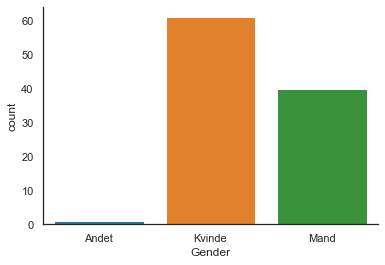

In [15]:
result= df.groupby('Gender')['ID'].nunique().reset_index().rename(columns={'ID': 'count'})
sns.barplot(x ='Gender', 
            y = 'count', 
            data = result, 
            palette = 'tab10'
           )
sns.despine();

In [18]:
df = pd.read_csv('Gantt_data.csv')

##### PRE-PROCESSING THE DATA ###### 
#Convert dates to datetime format
df[["Start", "Finish"]] = df[["Start", "Finish"]].apply(pd.to_datetime)

#Add Duration
df['duration']=df.Finish-df.Start
df.duration=df.duration.apply(lambda x: x.days+1)

#sort in ascending order of start date
df=df.sort_values(by='Start', ascending=True)

#project level variables
p_start=df.Start.min()
p_end=df.Finish.max()
p_duration=(p_end-p_start).days+1

#Add relative date
df['rel_start']=df.Start.apply(lambda x: (x-p_start).days)
df

,ID,Task,Start,Finish,Category,duration,rel_start
0,0,Inception,2022-02-09,2022-02-23,UML,15,0
1,1,Elaboration – I,2022-02-24,2022-03-08,UML,13,15
2,2,Elaboration – II,2022-03-09,2022-03-23,UML,15,28
3,3,Construction,2022-03-24,2022-04-20,Coding,28,43
4,4,Transition,2022-04-21,2022-04-27,Coding,7,71
5,5,Authoring,2022-04-28,2022-05-11,Report,14,78
6,6,Correction,2022-05-12,2022-05-19,Report,8,92
7,7,Finalizing,2022-05-20,2022-05-22,All,3,100


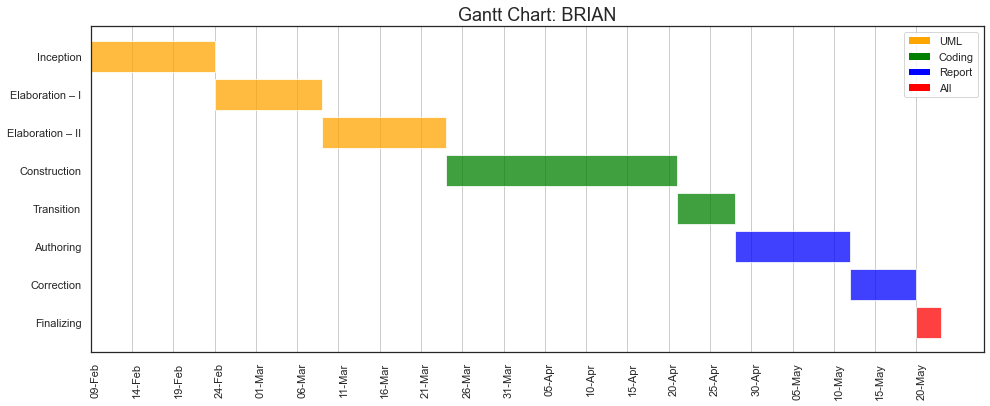

In [19]:
#Create custom x-ticks and x-tick labels
x_ticks=[i for i in range(p_duration+1)]
x_labels=[(p_start+dt.timedelta(days=i)).strftime('%d-%b') 
          for i in x_ticks] 

# colours
c_dict={'UML':'orange', 'Coding':'green', 'Report':'blue', 'All':'red'}


######  PLOTTING GANTT CHART ######
plt.figure(figsize=(16,6))
plt.title('Gantt Chart: BRIAN', size=18)

for i in range(df.shape[0]):
    color=c_dict[df.Category[i]]
    plt.barh(y=df.Task[i], left=df.rel_start[i], 
             width=df.duration[i], alpha=0.75, 
             color=color)

legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::5], labels=x_labels[::5], rotation=90, ha='right', rotation_mode='anchor')
plt.grid(axis='x');